In [2]:
!pip install keras


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8a/bf/9e3f10e55df30b0fb4bf6c2ee7d50bda2e070599b86f62ea3f9954af172b/keras-3.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/99/bd/fb8ed45308bb97e04c02bd7aed324ba11e6a4bf9ed73967ca2a168e9cf92/h5py-3.12.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/5c/25/dcc520ece35026e44ca7dc75f246eb132f6e29b3a52b989e180e1b05846c/optree-0.13.1-cp310-cp310-win_amd64.whl.metadata


In [3]:
!pip install tensorflow

  Obtaining dependency information for keras>=3.5.0 from https://files.pythonhosted.org/packages/8a/bf/9e3f10e55df30b0fb4bf6c2ee7d50bda2e070599b86f62ea3f9954af172b/keras-3.7.0-py3-none-any.whl.metadata
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [ ]:
!pip uninstall keras

In [ ]:
!pip install keras==2.15.0

# Backpropagation + DeconvNet + GuidedBackprop + SmoothGrad

In this experiment, I will illustrate how to apply above methods on a pretrained VGG16 net (Keras + Tensorflow backend). This is GPU-free implementation, so you it should work on most of the computers.

1) We first download the weights of VGG16 net and test it on a randomly downloaded image from the internet.

In [1]:
from keras.applications import VGG16
from keras.applications.vgg16 import decode_predictions, preprocess_input
from keras import backend as K 

VGG16_net = VGG16(weights='imagenet')

In [2]:
print (VGG16_net.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃                ┃ Output     ┃ Param ┃
┃ Layer (type)   ┃ Shape      ┃     # ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer    │ (None,     │     0 │
│ (InputLayer)   │ 224, 224,  │       │
│                │ 3)         │       │
├────────────────┼────────────┼───────┤
│ block1_conv1   │ (None,     │ 1,792 │
│ (Conv2D)       │ 224, 224,  │       │
│                │ 64)        │       │
├────────────────┼────────────┼───────┤
│ block1_conv2   │ (None,     │ 36,9… │
│ (Conv2D)       │ 224, 224,  │       │
│                │ 64)        │       │
├────────────────┼────────────┼───────┤
│ block1_pool    │ (None,     │     0 │
│ (MaxPooling2D) │ 112, 112,  │       │
│                │ 64)        │       │
├────────────────┼────────────┼───────┤
│ block2_conv1   │ (None,     │ 73,8… │
│ (Conv2D)       │ 112, 112,  │       │
│                │ 128)       │       │
├────────────────┼────────────┼───────┤
│ block2_conv2   │ (None,     │ 147,… │
│ (Conv2D)       │ 112, 112,  │       │
│                │ 128)       │       │
├────────────────┼────────────┼───────┤
│ block2_pool    │ (None, 56, │     0 │
│ (MaxPooling2D) │ 56, 128)   │       │
├────────────────┼────────────┼───────┤
│ block3_conv1   │ (None, 56, │ 295,… │
│ (Conv2D)       │ 56, 256)   │       │
├────────────────┼────────────┼───────┤
│ block3_conv2   │ (None, 56, │ 590,… │
│ (Conv2D)       │ 56, 256)   │       │
├────────────────┼────────────┼───────┤
│ block3_conv3   │ (None, 56, │ 590,… │
│ (Conv2D)       │ 56, 256)   │       │
├────────────────┼────────────┼───────┤
│ block3_pool    │ (None, 28, │     0 │
│ (MaxPooling2D) │ 28, 256)   │       │
├────────────────┼────────────┼───────┤
│ block4_conv1   │ (None, 28, │ 1,18… │
│ (Conv2D)       │ 28, 512)   │       │
├────────────────┼────────────┼───────┤
│ block4_conv2   │ (None, 28, │ 2,35… │
│ (Conv2D)       │ 28, 512)   │       │
├────────────────┼────────────┼───────┤
│ block4_conv3   │ (None, 28, │ 2,35… │
│ (Conv2D)       │ 28, 512)   │       │
├────────────────┼────────────┼───────┤
│ block4_pool    │ (None, 14, │     0 │
│ (MaxPooling2D) │ 14, 512)   │       │
├────────────────┼────────────┼───────┤
│ block5_conv1   │ (None, 14, │ 2,35… │
│ (Conv2D)       │ 14, 512)   │       │
├────────────────┼────────────┼───────┤
│ block5_conv2   │ (None, 14, │ 2,35… │
│ (Conv2D)       │ 14, 512)   │       │
├────────────────┼────────────┼───────┤
│ block5_conv3   │ (None, 14, │ 2,35… │
│ (Conv2D)       │ 14, 512)   │       │
├────────────────┼────────────┼───────┤
│ block5_pool    │ (None, 7,  │     0 │
│ (MaxPooling2D) │ 7, 512)    │       │
├────────────────┼────────────┼───────┤
│ flatten        │ (None,     │     0 │
│ (Flatten)      │ 25088)     │       │
├────────────────┼────────────┼───────┤
│ fc1 (Dense)    │ (None,     │ 102,… │
│                │ 4096)      │       │
├────────────────┼────────────┼───────┤
│ fc2 (Dense)    │ (None,     │ 16,7… │
│                │ 4096)      │       │
├────────────────┼────────────┼───────┤
│ predictions    │ (None,     │ 4,09… │
│ (Dense)        │ 1000)      │       │
└────────────────┴────────────┴───────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


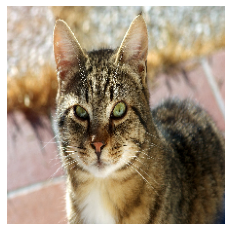

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

# image downloaded from: https://www.pexels.com/photo/animal-big-elephant-endangered-133394/
# preprocess the input before feeding into the network
img = image.load_img('cat.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img); plt.axis('off'); plt.show()

In [4]:
# make prediction
preds = VGG16_net.predict(x)
print('Predicted:')
for pred in decode_predictions(preds, top=10)[0]:
    print (pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
Predicted:
('n02123159', 'tiger_cat', 0.48929834)
('n02123045', 'tabby', 0.24653259)
('n02124075', 'Egyptian_cat', 0.18302603)
('n02127052', 'lynx', 0.07592627)
('n02120505', 'grey_fox', 0.0013871784)
('n02114855', 'coyote', 0.00057797605)
('n02125311', 'cougar', 0.00040321573)
('n02119789', 'kit_fox', 0.00026183756)
('n01877812', 'wallaby', 0.00023354238)
('n02114712', 'red_wolf', 0.00014816111)


It seems that the VGG16 net did a good job in recognizing this image is of an elephant. 

2) We now illustrate the heatmap obtained by using different variants of Backpropagation, starting with the vanilla Backpropagation itself.

## Backpropagation

Let's see the obtained heatmap of the most activated unit in the output layer.

In [5]:
from backprop import Backpropagation
from tensorflow.keras.backend import mean

# masking is for selecting which unit to be mapped back
preds = VGG16_net.predict(x)
masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

backprop = Backpropagation(model=VGG16_net, 
                           layer_name='predictions',
                           input_data=x,
                           masking=masking)
heatmap, _ = backprop.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


Let's check the heatmap of the top 5 predicted labels.

In [6]:
top_n = 5
predicted_labels = ['African_elephant', 'tusker', 'Indian_elephant', 'water_buffalo', 'curly-coated_retriever']
predicted_units = preds[0].argsort()[::-1][:top_n]

In [7]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 3))
gs = gridspec.GridSpec(1, 5)
    
for gs_idx, output_idx in enumerate(predicted_units):
    masking = np.zeros(preds.shape)
    masking[0, output_idx] = 1.

    backprop = Backpropagation(model=VGG16_net, 
                               layer_name='predictions',
                               input_data=x,
                               masking=masking)
    heatmap, _ = backprop.compute()

    ax = fig.add_subplot(gs[0, gs_idx])
    ax.imshow(heatmap[0], cmap='gray')
    ax.set_title(predicted_labels[gs_idx])
    ax.axis('off')
plt.show()

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


<Figure size 1080x216 with 0 Axes>

# SmoothGrad

The idea is pretty simple, we will inject noise into the input and calculate these samples' gradients. We then take average across all samples to obtain the final heatmap.

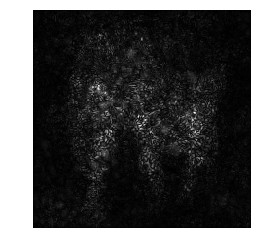

In [21]:
from backprop import SmoothGrad

masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

smoothgrad = SmoothGrad(model=VGG16_net, 
                           layer_name='predictions',
                           input_data=x,
                           masking=masking)
heatmap  = smoothgrad.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

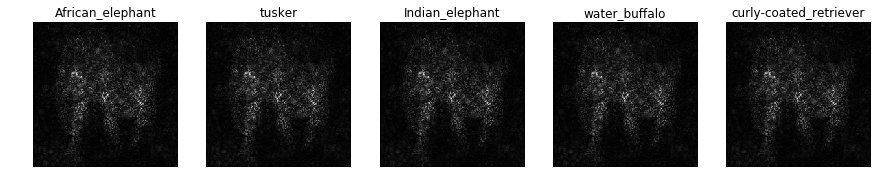

In [22]:
fig = plt.figure(figsize=(15, 3))
gs = gridspec.GridSpec(1, 5)
    
for gs_idx, output_idx in enumerate(predicted_units):
    masking = np.zeros(preds.shape)
    masking[0, output_idx] = 1.

    smoothgrad = SmoothGrad(model=VGG16_net, 
                               layer_name='predictions',
                               input_data=x,
                               masking=masking)
    heatmap = smoothgrad.compute()

    ax = fig.add_subplot(gs[0, gs_idx])
    ax.imshow(heatmap[0], cmap='gray')
    ax.set_title(predicted_labels[gs_idx])
    ax.axis('off')
plt.show()

Interestingly, all five heatmaps now look alike.

# GuidedBackprop

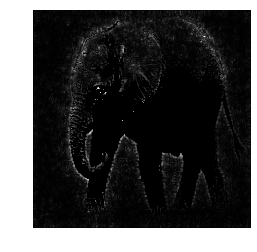

In [44]:
from backprop import GuidedBackprop

masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

guidedbackprop = GuidedBackprop(model=VGG16_net, 
                           layer_name='predictions',
                           input_data=x,
                           masking=masking)
heatmap  = guidedbackprop.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

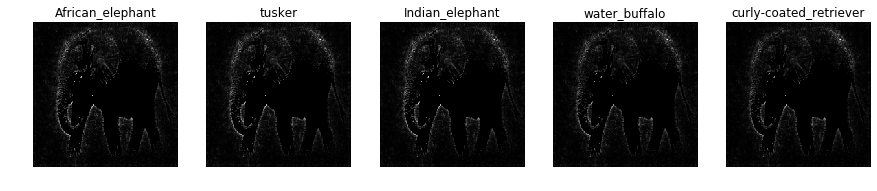

In [45]:
fig = plt.figure(figsize=(15, 3))
gs = gridspec.GridSpec(1, 5)
    
for gs_idx, output_idx in enumerate(predicted_units):
    masking = np.zeros(preds.shape)
    masking[0, output_idx] = 1.

    guidedbackprop = GuidedBackprop(model=VGG16_net, 
                               layer_name='predictions',
                               input_data=x,
                               masking=masking)
    heatmap = guidedbackprop.compute()

    ax = fig.add_subplot(gs[0, gs_idx])
    ax.imshow(heatmap[0], cmap='gray')
    ax.set_title(predicted_labels[gs_idx])
    ax.axis('off')
plt.show()

# DeconvNet

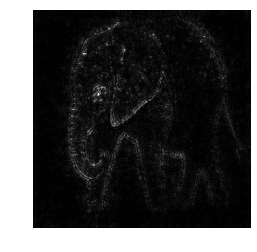

In [49]:
from backprop import DeconvNet

masking = np.zeros(preds.shape)
masking[0, np.argmax(preds)] = 1.

deconvnet = DeconvNet(model=VGG16_net, 
                           layer_name='predictions',
                           input_data=x,
                           masking=masking)
heatmap  = deconvnet.compute()
plt.imshow(heatmap[0], cmap='gray'); plt.axis('off'); plt.show()

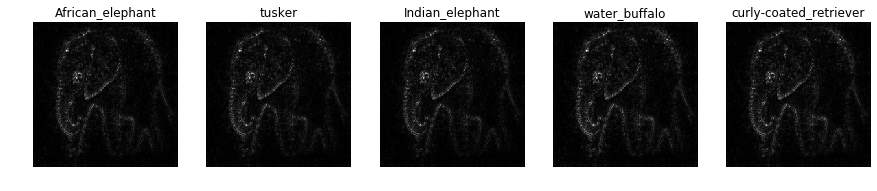

In [50]:
fig = plt.figure(figsize=(15, 3))
gs = gridspec.GridSpec(1, 5)
    
for gs_idx, output_idx in enumerate(predicted_units):
    masking = np.zeros(preds.shape)
    masking[0, output_idx] = 1.

    deconvnet = DeconvNet(model=VGG16_net, 
                               layer_name='predictions',
                               input_data=x,
                               masking=masking)
    heatmap = deconvnet.compute()

    ax = fig.add_subplot(gs[0, gs_idx])
    ax.imshow(heatmap[0], cmap='gray')
    ax.set_title(predicted_labels[gs_idx])
    ax.axis('off')
plt.show()